In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [6]:
data=pd.read_csv("train.csv")

In [11]:
missing_percent = data.isnull().sum() / len(data) * 100
missing_percent = missing_percent.reset_index().rename(columns={"index": "column", 0: "percent missing"})
missing_percent

,column,percent missing
0,PassengerId,0.000000
1,Survived,0.000000
2,Pclass,0.000000
3,Name,0.000000
4,Sex,0.000000
5,Age,19.865320
6,SibSp,0.000000
7,Parch,0.000000
8,Ticket,0.000000
9,Fare,0.000000


In [9]:
data['Age'].mean()

29.69911764705882

In [13]:
train1=data.copy()

In [15]:
train1.dropna(subset='Age',how='any',inplace=True)
train1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [31]:
train1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [27]:
main_imputer=SimpleImputer(strategy='most_frequent')

In [29]:
train1.iloc[:,:]=main_imputer.fit_transform(train1)

In [3]:
train1=data.copy()

NameError: name 'data' is not defined

### k=2
### normalizacija (min max scaler)


In [407]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
scaler=MinMaxScaler()
train1['Age']=scaler.fit_transform(train1['Age'].to_numpy().reshape(-1,1))

In [51]:
train1['Age']

0      0.271174
1      0.472229
2      0.321438
3      0.434531
4      0.434531
         ...   
886    0.334004
887    0.233476
888         NaN
889    0.321438
890    0.396833
Name: Age, Length: 891, dtype: float64

In [53]:
from sklearn.impute import KNNImputer

In [55]:
imp=KNNImputer(n_neighbors=2)

In [57]:
train1['Age']=imp.fit_transform(train1['Age'].to_numpy().reshape(-1,1))

In [59]:
train1['Age'].isnull().sum()

0

### Mice kako daden paket ni sluzi so pomos na round robin pravi regresija na random delcinja od datasetot naogja sredna vrednost i zamenuva

In [62]:
train1=data.copy()

In [68]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [70]:
imp=IterativeImputer(random_state=0)

In [72]:
train1['Age']=imp.fit_transform(train1['Age'].to_numpy().reshape(-1,1))

In [74]:
train1['Age'].isnull().sum()

0

In [146]:
df = pd.read_csv('city_day.csv')

In [148]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [150]:
df['Xylene'][50:70]  #za da ne bide cel data set samo redobite od 50-70

50     7.48
51    15.44
52     8.47
53    28.46
54     6.05
55     0.81
56      NaN
57      NaN
58      NaN
59     1.32
60     0.22
61     2.25
62     1.55
63     4.13
64      NaN
65     0.39
66     0.63
67     1.35
68     1.74
69     2.78
Name: Xylene, dtype: float64

### FFILL

In [152]:
df1=df.copy()
df1.fillna(method="ffill",inplace=True) 

C:\Users\dimit\AppData\Local\Temp\ipykernel_19200\3195901736.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1.fillna(method="ffill",inplace=True)


In [154]:
df1['Xylene'][50:70]

50     7.48
51    15.44
52     8.47
53    28.46
54     6.05
55     0.81
56     0.81
57     0.81
58     0.81
59     1.32
60     0.22
61     2.25
62     1.55
63     4.13
64     4.13
65     0.39
66     0.63
67     1.35
68     1.74
69     2.78
Name: Xylene, dtype: float64

### BFILL

In [144]:
df['Xylene'][50:70]

50     7.48
51    15.44
52     8.47
53    28.46
54     6.05
55     0.81
56     0.81
57     0.81
58     0.81
59     1.32
60     0.22
61     2.25
62     1.55
63     4.13
64     4.13
65     0.39
66     0.63
67     1.35
68     1.74
69     2.78
Name: Xylene, dtype: float64

In [156]:
df2=df.copy()
df2.fillna(method="bfill",inplace=True) 

C:\Users\dimit\AppData\Local\Temp\ipykernel_19200\1818670485.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2.fillna(method="bfill",inplace=True)


In [158]:
df2['Xylene'][50:70]

50     7.48
51    15.44
52     8.47
53    28.46
54     6.05
55     0.81
56     1.32
57     1.32
58     1.32
59     1.32
60     0.22
61     2.25
62     1.55
63     4.13
64     0.39
65     0.39
66     0.63
67     1.35
68     1.74
69     2.78
Name: Xylene, dtype: float64

In [160]:
df3=df.copy()
df3.interpolate(limit_direction="both",inplace=True) 

C:\Users\dimit\AppData\Local\Temp\ipykernel_19200\4134289912.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df3.interpolate(limit_direction="both",inplace=True)


In [166]:
df3['Xylene'][50:70]

50     7.4800
51    15.4400
52     8.4700
53    28.4600
54     6.0500
55     0.8100
56     0.9375
57     1.0650
58     1.1925
59     1.3200
60     0.2200
61     2.2500
62     1.5500
63     4.1300
64     2.2600
65     0.3900
66     0.6300
67     1.3500
68     1.7400
69     2.7800
Name: Xylene, dtype: float64

### CUSTOM ENCODER

In [172]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [176]:
classes=list(set(data['Embarked']))
classes

['S', nan, 'Q', 'C']

In [180]:
dict={}
for i in range(0,len(classes)):
    dict[classes[i]]=i
dict

{'S': 0, nan: 1, 'Q': 2, 'C': 3}

In [184]:
data['Embarked']=[dict[i] for i in data['Embarked']]

In [186]:
data['Embarked']

0      0
1      3
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    3
890    2
Name: Embarked, Length: 891, dtype: int64

### Label Encoder 

In [190]:
from sklearn.preprocessing import LabelEncoder

In [192]:
le=LabelEncoder()

In [194]:
data['Sex']=le.fit_transform(data['Sex'])

In [196]:
data['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

In [198]:
le.classes_

array(['female', 'male'], dtype=object)

### One hot Encoder

In [204]:
from sklearn.preprocessing import OneHotEncoder

In [214]:
enc=OneHotEncoder(handle_unknown='ignore')

In [228]:
enc_df=pd.DataFrame(enc.fit_transform(data['Sex'].to_numpy().reshape(-1,1)).toarray())

In [230]:
enc_df

,0,1
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
886,0.0,1.0
887,1.0,0.0
888,1.0,0.0
889,0.0,1.0


### count vectorizer e slicen so one hot no one hot go zima celoto ko kategorija dodeka ovoj go zima sekoj zbor oddelno

In [236]:
from sklearn.feature_extraction.text import CountVectorizer

In [238]:
v=CountVectorizer()

In [256]:
x=v.fit_transform(data['Name'])

In [258]:
x

<891x1509 sparse matrix of type '<class 'numpy.int64'>'
	with 3566 stored elements in Compressed Sparse Row format>

In [268]:
len(v.get_feature_names_out())

1509

In [276]:
pd.DataFrame(x.todense().tolist(),columns=v.get_feature_names_out())

,aaron,abbing,abbott,abelson,abraham,achem,achille,achilles,ada,adahl,...,youseff,yousif,youssef,yousseff,yrois,zabour,zebley,zenni,zillah,zimmerman
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Tuka pocnuva ML

In [284]:
df=pd.read_csv("advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [292]:
import seaborn as sns


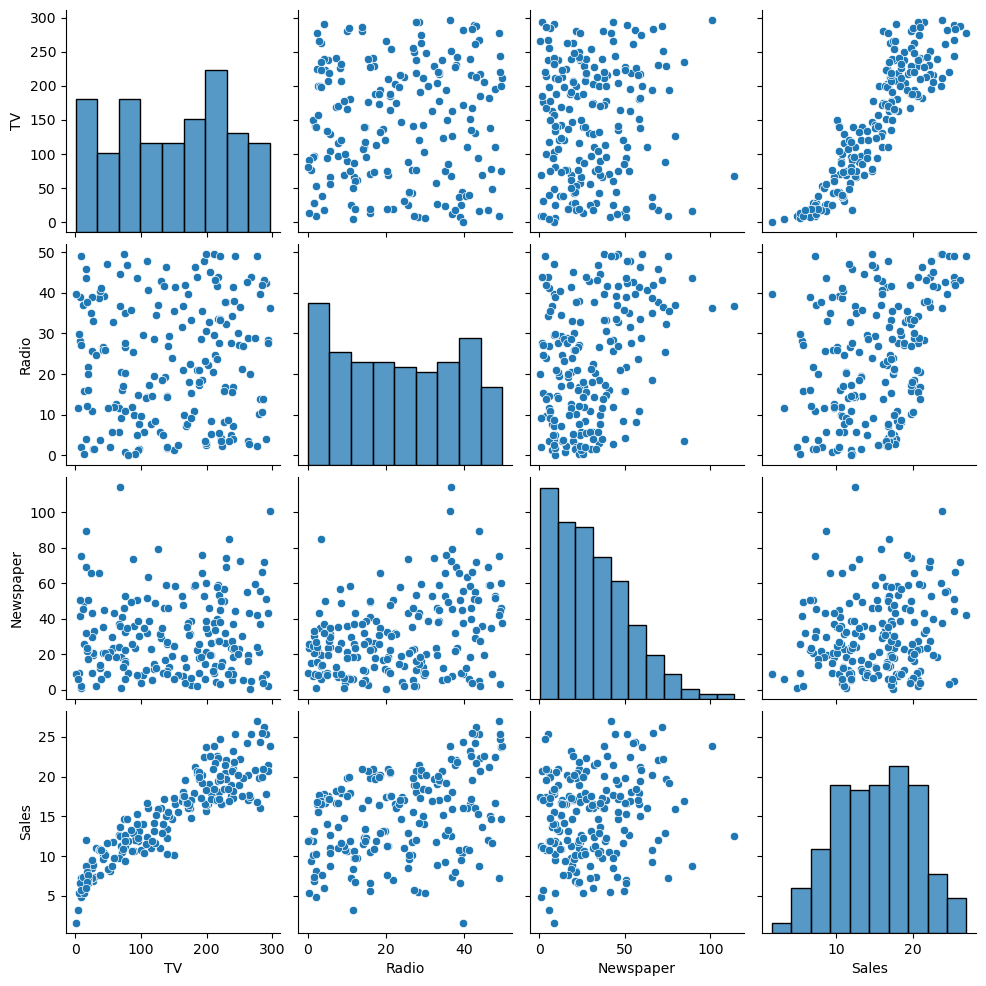

In [294]:
sns.pairplot(df)

In [296]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [298]:
from sklearn.model_selection import train_test_split

In [302]:
X_train,X_test,Y_train,Y_test=train_test_split(df.iloc[:,:-1],df['Sales'],test_size=0.2)

#### iloc[:,:-1] znaci deka gi zema site redovi i site koloni osven poslednata
#### df [Sales] e taget kolona

#### ova dole gi selektira prvite 80% od redovite od dataframeot
#### df[:n] means "select all rows from the start up to, but not including, row n."

In [310]:
train=df[:int(len(df)*0.8)]
train

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
155,4.1,11.6,5.7,3.2
156,93.9,43.5,50.5,15.3
157,149.8,1.3,24.3,10.1
158,11.7,36.9,45.2,7.3


In [314]:
test=df[:int(len(df)*0.8):]


In [316]:
from sklearn.preprocessing import StandardScaler

In [318]:
scaler=StandardScaler()

In [320]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [322]:
X_train

array([[ 0.96202178,  1.02450577,  0.08320351],
       [-0.2360223 ,  0.97028342,  2.21973169],
       [ 0.76059111,  1.83106313,  0.34121645],
       [-1.24551789,  1.25495073, -1.10275068],
       [-0.38592419, -0.3513862 ,  0.38195533],
       [-1.12255149, -0.7444982 , -0.5324063 ],
       [ 1.28290553,  0.29250413, -1.11633031],
       [ 0.04504376,  0.88217211, -1.0936976 ],
       [-0.89769864, -0.14127462, -0.53693284],
       [-0.05332936,  0.28572633,  0.72597258],
       [-0.58735487, -1.43583308, -1.030326  ],
       [-1.38605092, -1.42227749, -0.42829582],
       [ 0.12585026, -1.35449956, -0.98958711],
       [-1.14246034,  1.65484051, -0.98053403],
       [ 0.52988272,  0.4145044 , -0.54145938],
       [-1.64486592,  0.49583792, -0.93979514],
       [-0.2910644 , -0.96138757,  0.83913615],
       [-1.49847735,  1.01772797, -0.38755693],
       [-0.06504044, -1.40194411, -0.95790132],
       [-0.30043327, -0.20227476, -0.8402112 ],
       [ 1.72207125,  0.38739323,  0.590

## Linearna regresija

In [324]:
from sklearn.linear_model import LinearRegression

In [326]:
model=LinearRegression()

In [328]:
model.fit(X_train,Y_train)

LinearRegression()

In [330]:
model.score(X_train,Y_train)

0.9017869718458996

In [332]:
model.coef_

array([4.62535064, 1.45945056, 0.01635922])

In [336]:
#sales=4.62535064*TV+1.45945056*Radio+0.01635922*Newspaper

In [338]:
model.intercept_

15.026874999999995

In [340]:
y_pred=model.predict(X_test)

In [342]:
y_pred

array([ 7.0971199 , 20.57493556, 21.47722825, 18.91483007, 14.92921519,
       20.45009341, 23.66367957, 18.103879  , 14.15913176, 10.12134577,
        8.01708787, 10.92354687,  8.50000189, 15.51817174, 17.25249953,
       20.74609434, 19.21408556, 13.13087499,  9.52813086, 21.73839875,
       11.24652135, 22.59864068,  8.07563182, 10.98089243, 20.55148084,
       18.92758957, 16.88454917, 15.77505661, 19.37449716, 18.25127915,
        6.24370263, 21.04455648, 15.58393959, 20.01974642, 13.84359912,
        7.98160382, 18.06238489,  6.59195427, 24.7552857 , 16.60372695])

In [344]:
Y_test

189     6.7
55     23.7
150    16.1
168    17.1
87     16.0
185    22.6
36     25.4
153    16.0
57     13.2
136     9.5
132     5.7
148    10.9
182     8.7
26     15.0
122    16.6
52     22.6
14     19.0
157    10.1
65     11.3
111    21.8
6      11.8
137    20.8
56      5.5
82     11.3
124    19.7
23     20.5
162    19.9
4      17.9
53     21.2
21     17.5
155     3.2
28     18.9
89     16.7
92     19.4
116    12.2
60      8.1
193    19.6
91      7.3
183    26.2
45     16.1
Name: Sales, dtype: float64

In [346]:
import statsmodels.api as sm

In [348]:
x=sm.add_constant(X_train)

In [350]:
model=sm.OLS(Y_train,x)

In [352]:
result=model.fit()

In [356]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     477.5
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           2.33e-78
Time:                        12:04:58   Log-Likelihood:                -302.56
No. Observations:                 160   AIC:                             613.1
Df Residuals:                     156   BIC:                             625.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.0269      0.128    117.060      0.000      14.773      15.280
x1             4.6254      0.128     36.018      0.000       4.372       4.879
x2             1.4595      0.138     10.571      0.000       1.187       1.732
x3             0.0164      0.138      0.118      0.906      -0.256       0.289
==============================================================================
Omnibus:                       14.702   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               28.848
Skew:                          -0.398   Prob(JB):                     5.44e-07
Kurtosis:                       4.922   Cond. No.                         1.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [360]:
x=sm.add_constant(X_test)
result.predict(x)

array([ 7.0971199 , 20.57493556, 21.47722825, 18.91483007, 14.92921519,
       20.45009341, 23.66367957, 18.103879  , 14.15913176, 10.12134577,
        8.01708787, 10.92354687,  8.50000189, 15.51817174, 17.25249953,
       20.74609434, 19.21408556, 13.13087499,  9.52813086, 21.73839875,
       11.24652135, 22.59864068,  8.07563182, 10.98089243, 20.55148084,
       18.92758957, 16.88454917, 15.77505661, 19.37449716, 18.25127915,
        6.24370263, 21.04455648, 15.58393959, 20.01974642, 13.84359912,
        7.98160382, 18.06238489,  6.59195427, 24.7552857 , 16.60372695])

## KNN Classification

In [370]:
data2=pd.read_csv('Bank_Personal_Loan_Modelling.csv')
data2

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


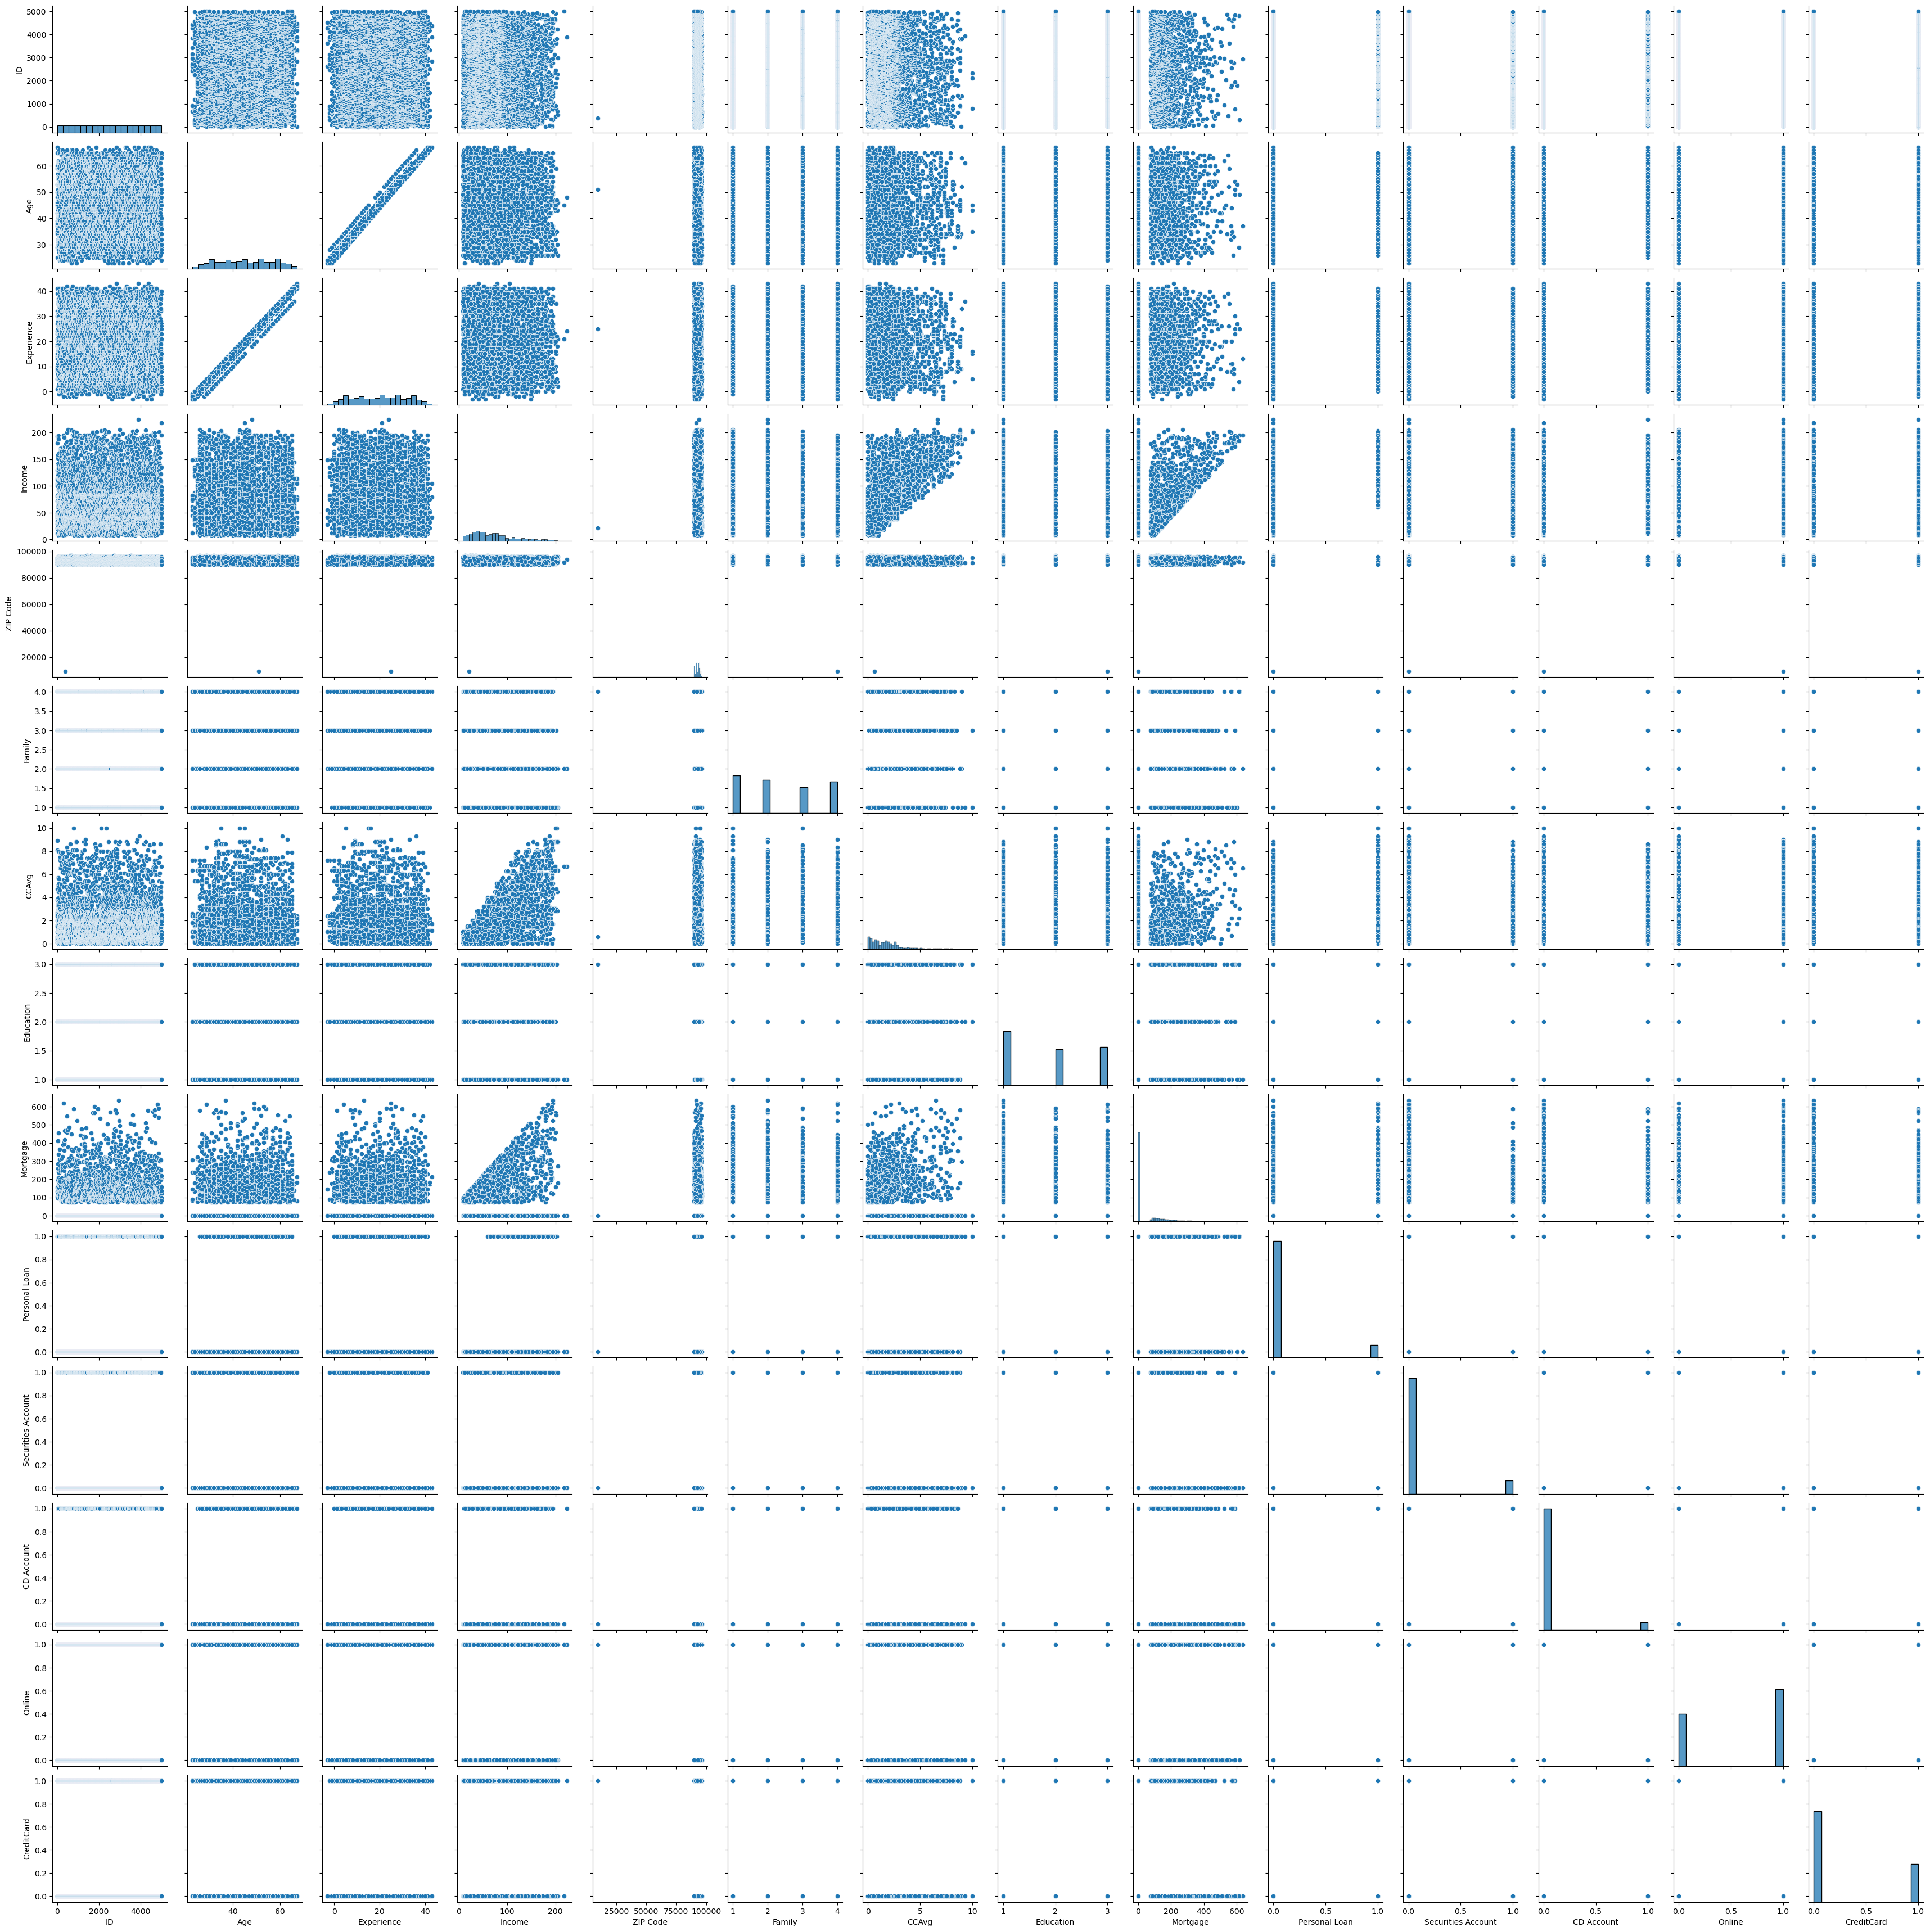

In [372]:
sns.pairplot(data2)

In [376]:
t=data2.drop('Personal Loan',axis='columns')
X_train,X_test,Y_train,Y_test=train_test_split(t.iloc[:,1:],data2['Personal Loan'],test_size=0.2)

In [378]:
X_train

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
4394,57,31,25,94523,2,0.70,2,103,0,0,0,0
1811,28,3,11,94534,4,0.50,3,0,0,0,0,0
1175,29,4,58,91006,1,0.80,2,0,0,0,1,1
1201,35,8,38,95060,4,1.00,2,0,0,0,1,0
3615,58,34,149,95616,2,6.00,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2038,50,24,150,94551,1,7.30,1,0,0,0,1,1
1436,46,21,80,95054,4,0.40,1,0,0,0,1,1
3225,52,28,38,95064,4,0.90,2,0,0,0,0,1
132,31,1,51,90840,2,1.75,3,0,0,0,0,0


In [382]:
data2['Personal Loan'].value_counts() #proveruvame za kakov vid na specifikacija e,tuka e binarna

Personal Loan
0    4520
1     480
Name: count, dtype: int64

In [384]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [386]:
from sklearn.neighbors import KNeighborsClassifier

In [388]:
cl=KNeighborsClassifier(n_neighbors=5)

In [390]:
cl.fit(X_train,Y_train)

KNeighborsClassifier()

In [394]:
y_pred=cl.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [396]:
from sklearn.metrics import classification_report, confusion_matrix

In [398]:
confusion_matrix(Y_test,y_pred)

array([[901,   4],
       [ 40,  55]], dtype=int64)

In [402]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       905
           1       0.93      0.58      0.71        95

    accuracy                           0.96      1000
   macro avg       0.94      0.79      0.85      1000
weighted avg       0.96      0.96      0.95      1000



### Logisticka regresija


In [426]:
df=pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [430]:
x=df.copy()
x.drop('Personal Loan',axis=1,inplace=True)

In [432]:
x.drop('ID',axis=1,inplace=True)

In [434]:
X_train,X_test,Y_train,Y_test=train_test_split(x,df['Personal Loan'],test_size=0.2)

In [436]:
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [438]:
from sklearn.linear_model import LogisticRegression

In [440]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [442]:
y_pred=model.predict(X_test)

In [444]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [446]:
model.coef_

array([[-0.1595749 ,  0.2992974 ,  2.52433497,  0.04301298,  0.81557549,
         0.23867178,  1.3979833 ,  0.02230751, -0.37974541,  0.92489114,
        -0.3158908 , -0.50058207]])

In [448]:
model.intercept_

array([-4.68641702])

In [452]:
print(confusion_matrix(Y_test,y_pred))

[[886  20]
 [ 31  63]]


#### Confusion matricata ni kazuva kolku ima truepositives,falsenegatives,falsepositives,truenegatives


In [456]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       906
           1       0.76      0.67      0.71        94

    accuracy                           0.95      1000
   macro avg       0.86      0.82      0.84      1000
weighted avg       0.95      0.95      0.95      1000



In [458]:
(Y_test!=y_pred).sum()

51